In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

# **Unziping image into drive**

In [ ]:
!unzip  /content/drive/MyDrive/text2human/images.zip  -d /content/drive/MyDrive/text2human

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004558-03_7_additional.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-03_1_front.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-03_4_full.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-03_7_additional.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-04_1_front.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-04_2_side.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-04_4_full.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004559-04_7_additional.jpg  
  inflating: /content/drive/MyDrive/text2human/images/WOMEN-Tees_Tanks-id_00004560-06_1_front.jpg  
  inflating: /content/drive/MyDrive/t

check number images

In [ ]:
import os

dir_image = "/content/drive/MyDrive/text2human/images/"


files_image = os.listdir(dir_image)
num_image_files = len(files_image)
print("num of image",num_image_files)

num of image 44096


# **LoadCAPTIONS.JSON**

In [ ]:
import json


with open('/content/drive/MyDrive/captions.json', 'r', encoding='utf-8') as f:
  captions_data = json.load(f)


Split caption to key : value
                 image_id : description  

In [ ]:
def split_dict(d):

    keys = list(d.keys())
    values = list(d.values())
    return keys, values


data = captions_data

image_ids, descriptions = split_dict(data)


print(f"Image IDs: {image_ids[:1]}")
print(f"Descriptions: {descriptions[:1]}")

Image IDs: ['MEN-Denim-id_00000080-01_7_additional.jpg']
Descriptions: ['The lower clothing is of long length. The fabric is cotton and it has plaid patterns.']


In [ ]:
image_caption_dict = dict(zip(image_ids, descriptions))

def create_dataset(image_caption_dict, image_folder):

    dataset = []
    for image_id, caption in image_caption_dict.items():
        # image with image_id
        image_file = os.path.join(image_folder, image_id)
        if os.path.isfile(image_file):
            # Pair the image file with its caption
            dataset.append((image_file, caption))
    return dataset

import os
dataset = create_dataset(image_caption_dict, '/content/drive/MyDrive/text2human/images')


In [ ]:
for i in range(5):
    print(f"pair: {dataset[i]}")
    print("---")

pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-01_7_additional.jpg', 'His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-02_7_additional.jpg', 'His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-03_7_additional.jpg', 'His shirt has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The person wears a long pants. The pants are with cotton fabric and solid color patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-04_7_additional.jpg', 'The sweater the person wears has 

In [ ]:
def split_dataset(dataset):
    # Initialize two empty lists
    image_list = []
    caption_list = []

    # Loop through the dataset and append the items to the respective lists
    for item in dataset:
        image_list.append(item[0])  # Append the image file path
        caption_list.append(item[1])  # Append the caption

    return image_list, caption_list

# Use the function
image_list, caption_list = split_dataset(dataset)


In [ ]:
for i in range(5):
    print(f"Image: {image_list[i]}")
    print(f"Caption: {caption_list[i]}")
    print("---")


Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-01_7_additional.jpg
Caption: His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-02_7_additional.jpg
Caption: His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-03_7_additional.jpg
Caption: His shirt has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The person wears a long pants. The pants are with cotton fabric and solid color patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-04_7_additional.jpg
Caption: The sweater the per

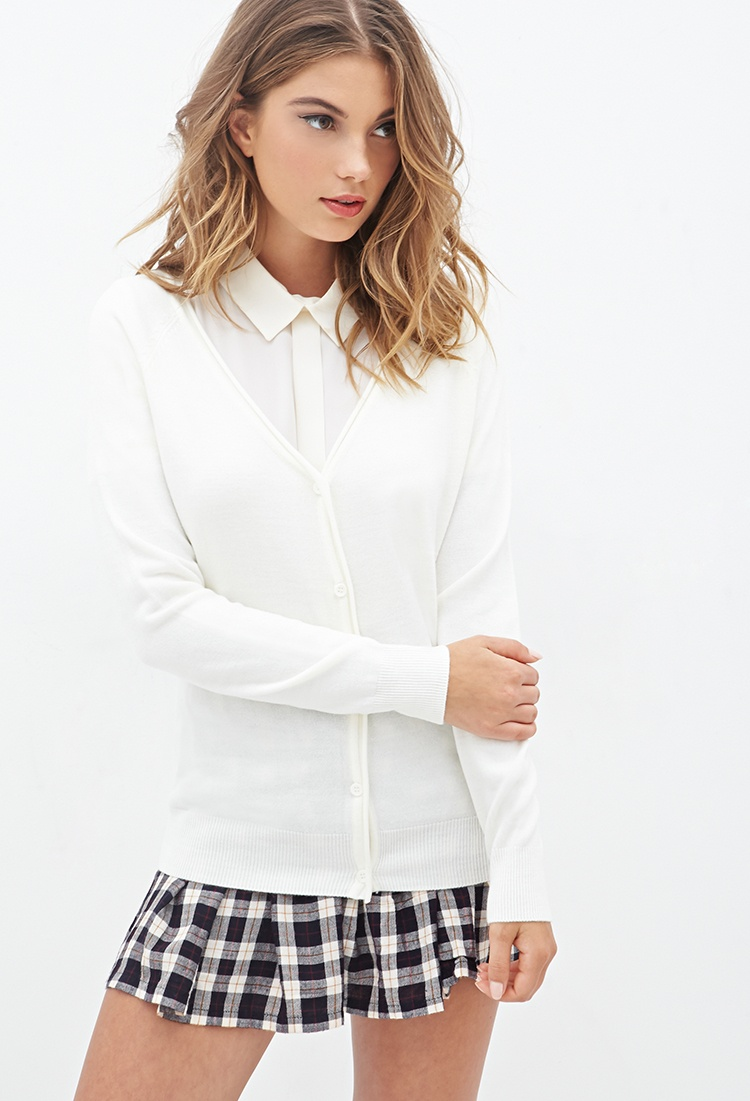

This lady is wearing a long-sleeve sweater with pure color patterns. The sweater is with chiffon fabric and its neckline is lapel. The pants this lady wears is of three-point length. The pants are with cotton fabric and plaid patterns. The person also wears an outer clothing, with cotton fabric and solid color patterns.


In [ ]:
from IPython.display import display, Image
import random

# Choose a random index
index = random.randint(0, len(image_list) - 1)

# Get the image file and caption using the random index
image_file = image_list[index]
caption = caption_list[index]

# Display the image
display(Image(filename=image_file))

# Print the caption
print(caption)



# ***Cleaning dataset***

clean description

In [ ]:
def to_lower(text):
    return text.lower()

import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in text.split() if word not in stop_words])

from nltk.stem import PorterStemmer

def stem_words(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

import nltk
nltk.download('stopwords')

def clean_text(text):
    text = to_lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = stem_words(text)
    return text

cleaned_captions = [clean_text(caption) for caption in caption_list]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


post_process_wrong_tokens


In [ ]:
def post_process_wrong_tokens(tokens_list):
    processed_tokens_list = []

    for tokens in tokens_list:
        processed_tokens = []

        current_word = ''

        for token in tokens:
            if token.startswith('##'):

                if current_word == '':
                    current_word = processed_tokens.pop()

                current_word += token[2:]
            else:
                if current_word:
                    processed_tokens.append(current_word)
                    current_word = ''

                processed_tokens.append(token)


        if current_word:
            processed_tokens.append(current_word)


        processed_tokens_list.append(processed_tokens)

    return processed_tokens_list

BertTokenizer

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

post_process_wrong_tokens(cleaned_captions)

# Tokenize the cleaned captions
tokenized_captions = [tokenizer.tokenize(caption) for caption in cleaned_captions[:100]]



for i in range(5):
    print(f"Cleaned: {cleaned_captions[i]}")
    print(f"Tokenized: {tokenized_captions[i]}")
    print("---")


new_token = post_process_wrong_tokens(tokenized_captions)
for i in range(5):
    print(f"new: {new_token[i]}")

Cleaned: tank top sleev cut cotton fabric pure color pattern necklin round pant man wear long length pant cotton fabric pure color pattern
Tokenized: ['tank', 'top', 'sl', '##ee', '##v', 'cut', 'cotton', 'fabric', 'pure', 'color', 'pattern', 'neck', '##lin', 'round', 'pan', '##t', 'man', 'wear', 'long', 'length', 'pan', '##t', 'cotton', 'fabric', 'pure', 'color', 'pattern']
---
Cleaned: sweater long sleev cotton fabric stripe pattern necklin lapel gentleman wear long pant pant cotton fabric solid color pattern
Tokenized: ['sweater', 'long', 'sl', '##ee', '##v', 'cotton', 'fabric', 'stripe', 'pattern', 'neck', '##lin', 'lap', '##el', 'gentleman', 'wear', 'long', 'pan', '##t', 'pan', '##t', 'cotton', 'fabric', 'solid', 'color', 'pattern']
---
Cleaned: shirt short sleev cotton fabric pure color pattern crew necklin person wear long pant pant cotton fabric solid color pattern
Tokenized: ['shirt', 'short', 'sl', '##ee', '##v', 'cotton', 'fabric', 'pure', 'color', 'pattern', 'crew', 'neck', 

clean image

In [ ]:
import cv2
import numpy as np

# Define the new image size
image_size = (224, 224)  # Replace with your desired size

# Initialize an empty list to store the processed images
processed_images = []

# Loop through the first 1000 images in the list
for image_file in image_list[:100]:
    # Read the image file
    image = cv2.imread(image_file)

    # Resize the image
    resized_image = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)

    # Normalize the image
    normalized_image = resized_image.astype(float) / 255.0

    # Append the processed image to the list
    processed_images.append(normalized_image)


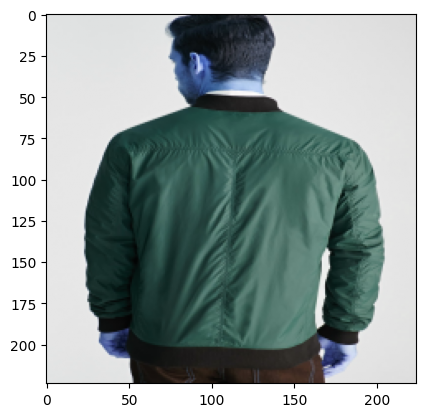

In [ ]:
import matplotlib.pyplot as plt

# Choose a random image from the processed images
processed_image = random.choice(processed_images)

# Display the image
plt.imshow(processed_image)
plt.show()


# ***load_dataset after cleaning***

In [ ]:
import pickle

# Save the lists to a file
with open('/content/drive/MyDrive/text2human/dataset.pkl', 'wb') as f:
    pickle.dump((processed_images, new_token), f)


# **Start with model STABLE Diffusion**

*`Dependancy`*

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 63858, done.
remote: Counting objects: 100% (14850/14850), done.
remote: Compressing objects: 100% (1707/1707), done.
remote: Total 63858 (delta 14014), reused 13472 (delta 13027), pack-reused 49008
Receiving objects: 100% (63858/63858), 46.68 MiB | 26.32 MiB/s, done.
Resolving deltas: 100% (46944/46944), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.29.0.dev0-py3-none-any.whl size=2175925 sha256=c8f70e1fd1f9ae31b638f945a045a82e0e33e6c486a1e6de60ee2273a9737c18
  Stored in directory: /tmp/pip-ephem-wheel-cache-rstwov2g/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 35.7 MB/s eta 

In [ ]:
!pip show tensorboard

Name: tensorboard
Version: 2.16.2
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, grpcio, markdown, numpy, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow


In [ ]:
!pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft


In [ ]:
!pip install tensorboard==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2


In [ ]:
!pip show tensorboard

Name: tensorboard
Version: 2.15.0
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, google-auth, google-auth-oauthlib, grpcio, markdown, numpy, protobuf, requests, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow


In [ ]:
# !pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.0
    Uninstalling tensorboard-2.15.0:
      Successfully uninstalled tensorboard-2.15.0
  Attempting uninstall: keras
    Found existing insta

In [ ]:
# !pip show tensorboard
# !pip show tensorflow

Name: tensorboard
Version: 2.16.2
Summary: TensorBoard lets you watch Tensors Flow
Home-page: https://github.com/tensorflow/tensorboard
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, grpcio, markdown, numpy, protobuf, setuptools, six, tensorboard-data-server, werkzeug
Required-by: tensorflow
Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!nvidia-smi

Sun Jun  2 16:13:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!accelerate config default --mixed_precision fp16

In [ ]:
import os

os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-2'
os.environ['DATASET_NAME'] = f'/content/drive/MyDrive/captions.json'
os.environ['OUTPUT_DIR'] = f'/content/drive/MyDrive/text2human/'

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=16 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=100000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
2024-06-07 00:18:24.531949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 00:18:24.532002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 00:18:24.643227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] 

In [ ]:
from transformers import AutoTokenizer, AutoModel
# from sentence_transformers import SentenceTransformer
import torch

# Load the pre-trained language model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
text_encoder = AutoModel.from_pretrained("bert-base-uncased").to("cuda")

# Load the Stable Diffusion pipeline
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2", torch_dtype=torch.float16)
pipe.to("cuda")

def generate_image(prompt):
    # Preprocess the input text
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    # Generate the text embeddings using the BERT model
    with torch.no_grad():
        text_embeddings = text_encoder(input_ids)[0]

    # Use the text embeddings to generate the image
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, text_embeddings=text_embeddings).images[0]

    return image




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "This gentleman is wearing a medium-sleeve shirt with pure color patterns. The shirt is with cotton fabric and its neckline is lapel. This gentleman wears a long trousers. The trousers are with cotton fabric and solid color patterns"
image = generate_image(prompt)
image.save("generated_image.png")

  0%|          | 0/50 [00:00<?, ?it/s]

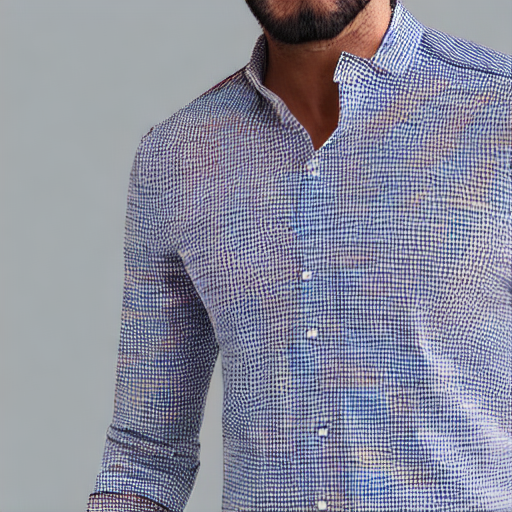

In [ ]:
from PIL import Image
display(image)

In [ ]:
# Print the parameters in a table
parameters = {
    "Pretrained Model": [pipe.model.config.name_or_path],
    "Dataset Name": [DATASET_NAME],
    "Use EMA": [use_ema],
    "Resolution": [resolution],
    "Center Crop": [center_crop],
    "Random Flip": [random_flip],
    "Train Batch Size": [train_batch_size],
    "Gradient Accumulation Steps": [gradient_accumulation_steps],
    "Gradient Checkpointing": [gradient_checkpointing],
    "Mixed Precision": [mixed_precision],
    "Max Train Steps": [max_train_steps],
    "Learning Rate": [learning_rate],
    "Max Gradient Norm": [max_grad_norm],
    "Push to Hub": [push_to_hub],
    "Checkpointing Steps": [checkpointing_steps],
    "LR Scheduler": [lr_scheduler],
    "LR Warmup Steps": [lr_warmup_steps],
    "Output Directory": [OUTPUT_DIR]
}


AttributeError: 'StableDiffusionPipeline' object has no attribute 'model_name_or_path'

# ***`New Exp`***

In [ ]:
from transformers import AutoTokenizer, AutoModel
# from sentence_transformers import SentenceTransformer
import torch

# Load the pre-trained language model
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-large-cased")
text_encoder = AutoModel.from_pretrained("google-bert/bert-large-cased").to("cuda")

# Load the Stable Diffusion pipeline
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2", torch_dtype=torch.float16)
pipe.to("cuda")

def generate_image(prompt):
    # Preprocess the input text
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    # Generate the text embeddings using the BERT model
    with torch.no_grad():
        text_embeddings = text_encoder(input_ids)[0]

    # Use the text embeddings to generate the image
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, text_embeddings=text_embeddings).images[0]

    return image




tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "This gentleman is wearing a medium-sleeve shirt with pure color patterns. The shirt is with cotton fabric and its neckline is lapel. This gentleman wears a long trousers. The trousers are with cotton fabric and solid color patterns"
image1 = generate_image(prompt)
image.save("generated_image+1.png")

  0%|          | 0/50 [00:00<?, ?it/s]

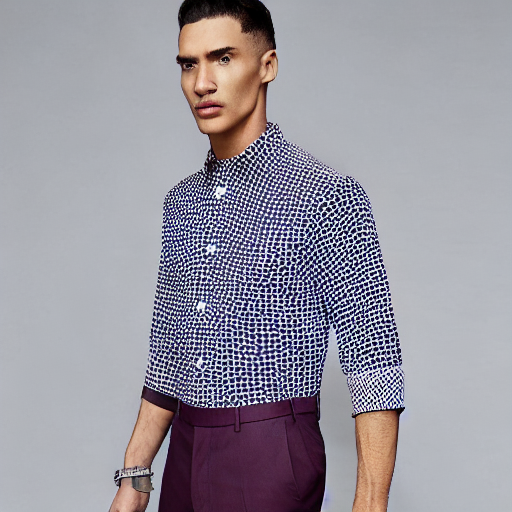

In [ ]:
display(image1)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-large-uncased-whole-word-masking")
text_encoder = AutoModel.from_pretrained("google-bert/bert-large-uncased-whole-word-masking").to("cuda")

from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2", torch_dtype=torch.float16)
pipe.to("cuda")

def generate_image(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        text_embeddings = text_encoder(input_ids)[0]

    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, text_embeddings=text_embeddings).images[0]

    return image




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

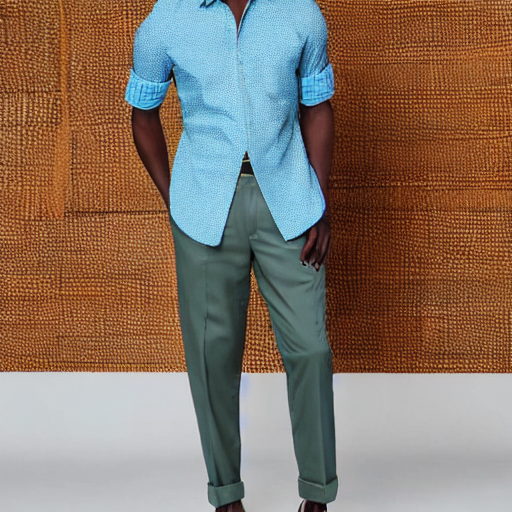

In [ ]:
prompt = "This gentleman is wearing a medium-sleeve shirt with pure color patterns. The shirt is with cotton fabric and its neckline is lapel. This gentleman wears a long trousers. The trousers are with cotton fabric and solid color patterns"
image2 = generate_image(prompt)
image.save("generated_image+2.png")
display(image2)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
text_encoder = AutoModel.from_pretrained("bert-base-cased").to("cuda")

from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2", torch_dtype=torch.float16)
pipe.to("cuda")

def generate_image(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        text_embeddings = text_encoder(input_ids)[0]

    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, text_embeddings=text_embeddings).images[0]

    return image




tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

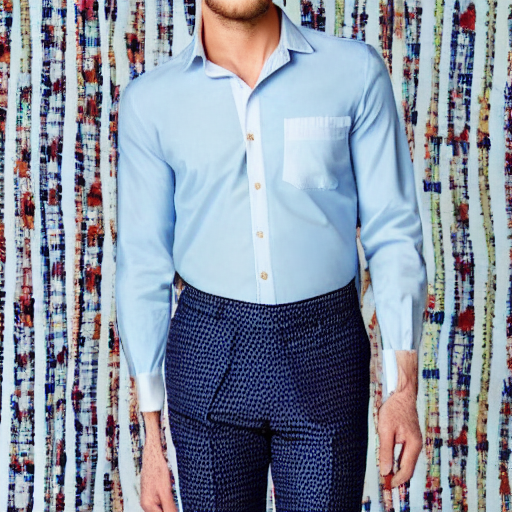

In [ ]:
prompt = "This gentleman is wearing a medium-sleeve shirt with pure color patterns. The shirt is with cotton fabric and its neckline is lapel. This gentleman wears a long trousers. The trousers are with cotton fabric and solid color patterns"
image3 = generate_image(prompt)
image.save("generated_image+2.png")
display(image3)

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from diffusers import StableDiffusionPipeline
import torch

# Load the GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")
text_encoder = GPT2LMHeadModel.from_pretrained("gpt2-large").to("cuda")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2", torch_dtype=torch.float16)
pipe.to("cuda")

def generate_image(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        text_embeddings = text_encoder(input_ids)[0]

    image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5, text_embeddings=text_embeddings).images[0]

    return image

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

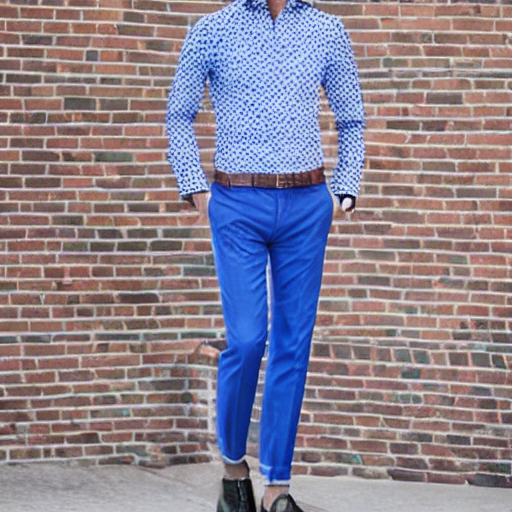

In [ ]:
prompt = "This gentleman is wearing a medium-sleeve shirt with pure color patterns. The shirt is with cotton fabric and its neckline is lapel. This gentleman wears a long trousers. The trousers are with cotton fabric and solid color patterns"
image4 = generate_image(prompt)
image4.save("generated_image+4.png")
display(image4)